In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
from scipy.signal import savgol_filter
import seaborn as sns
import ast
sns.set()


# REWARD, Q-VALUES, ETC. INFO

In [2]:
!ls ../info/

dist.txt	     vanilla_a3c_training_info.txt
mercury_info_parsed  vanilla_a3c_training_results.csv
train_arrays.txt


In [3]:
path_2 = '/media/hdd/Teleco/TFM/mercury/repo/lite/gride/gride_model/samples/summersim_2020/rl/results/2_new_NN_architecture/3_hetero_cooling/0_inlet_21_delta_0025_factor_01_sessions_5_episodes_45_great_results'
df_2 = pd.read_csv(path_2+"/train_arrays.txt",
                   delimiter=",",
                   names=["Log probability", "_",
                          "Reward", "V(s)",
                          "Return", "Entropy"])
df_2 = df_2.drop(["_"], axis=1)
df_2["Log probability"] = df_2["Log probability"].apply(lambda x: x.split("(")[1])
df_2["Log probability"] = df_2["Log probability"].astype("float64")


df_2["A(s,a)"] = df_2["Return"] - df_2["V(s)"]

df_2

,Log probability,Reward,V(s),Return,Entropy,"A(s,a)"
0,-0.6979,-1841.206543,-0.238786,2.111868,1.021932,2.350654
1,-1.6709,-1922.880371,-0.229316,2.067587,1.030118,2.296903
2,-0.7251,-1926.235596,-0.222004,2.040054,1.031911,2.262058
3,-0.7478,-1952.803711,-0.193748,2.012950,1.039397,2.206698
4,-0.7522,-1966.660156,-0.185576,1.991165,1.040801,2.176741
...,...,...,...,...,...,...
323163,-0.0001,-1596.069580,0.136945,0.042109,0.001465,-0.094836
323164,-0.0001,-1598.101929,0.136945,0.060074,0.001465,-0.076871
323165,-0.0001,-1596.069580,0.135720,0.079257,0.001461,-0.056463
323166,-0.0001,-1592.004883,0.136945,0.097597,0.001465,-0.039348


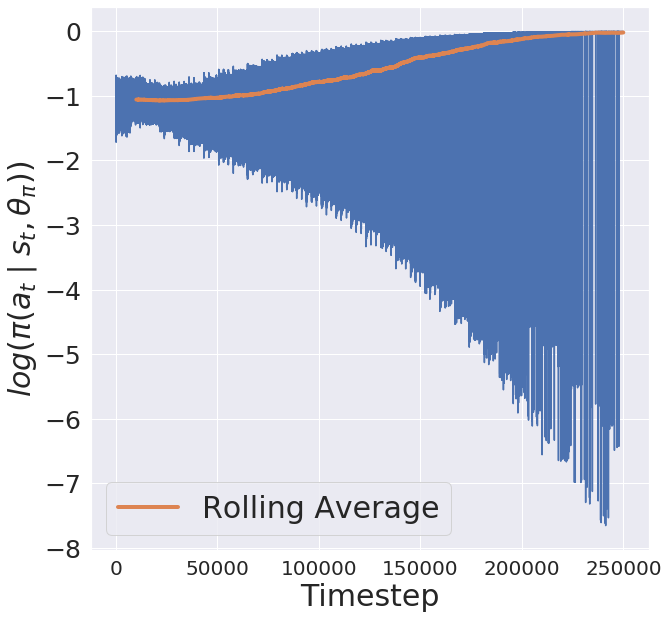

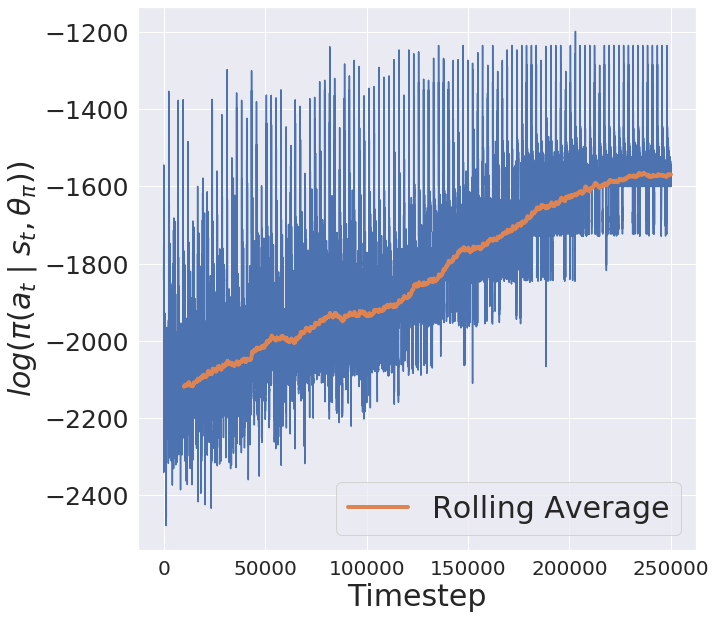

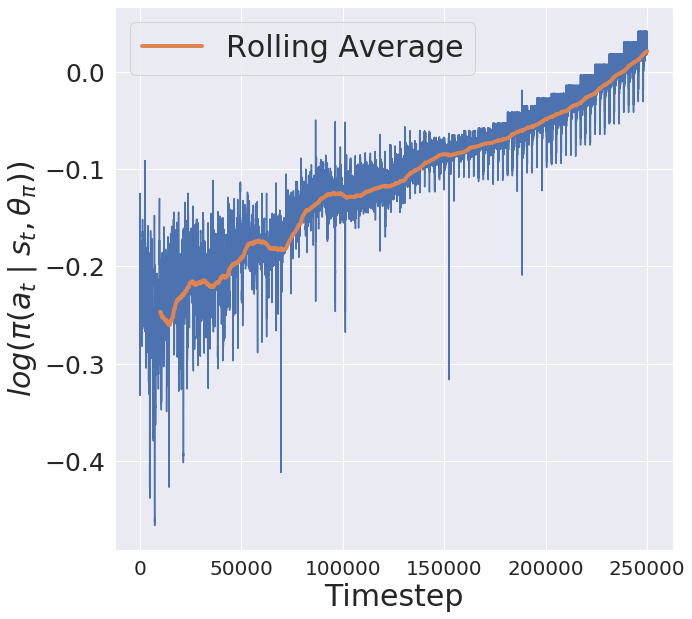

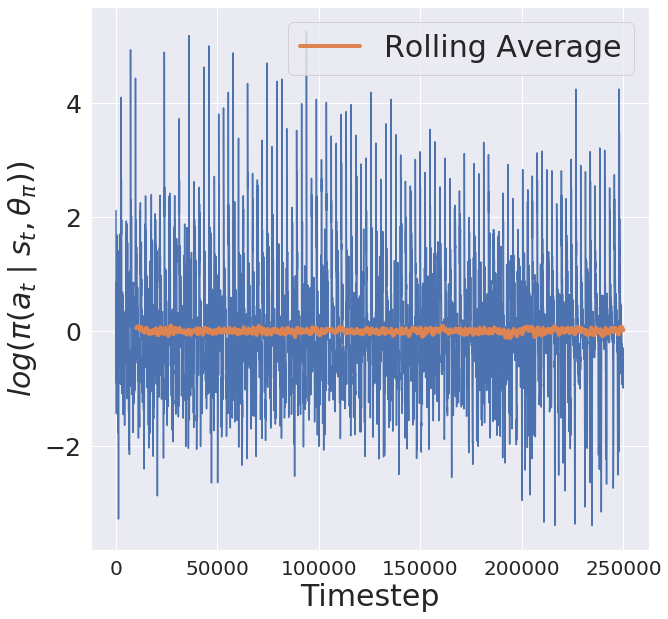

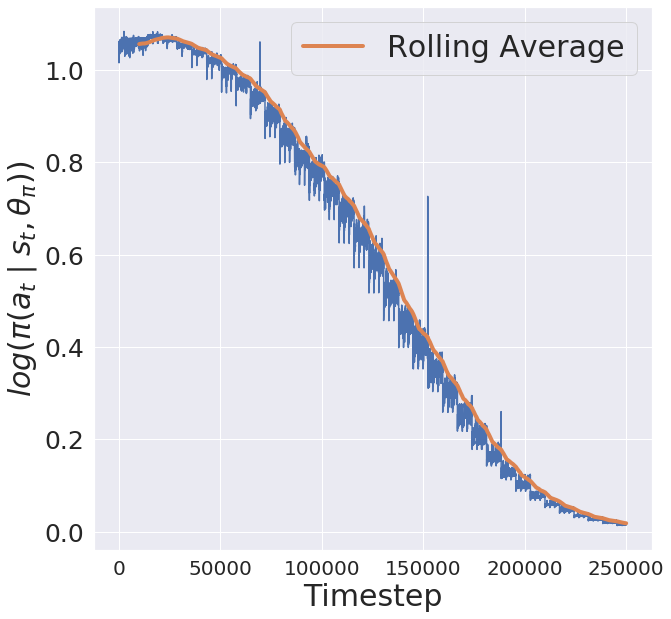

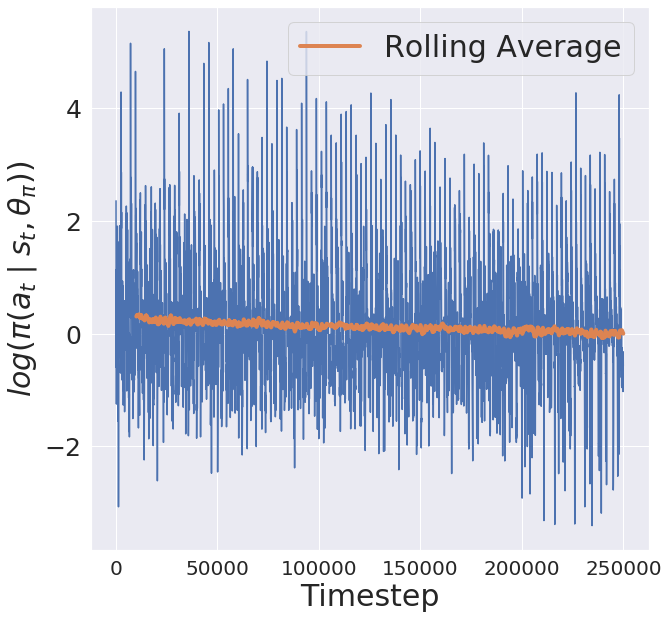

In [7]:
for col in df_2.columns:
    plt.figure(figsize=(10,10))
    plt.plot(df_2.iloc[:250000][col])
    plt.plot(pd.Series.rolling(pd.Series(df_2.iloc[:250000][col]), 10000).mean(), linewidth=4, label="Rolling Average")
    plt.ylabel(col, fontsize=30)
    plt.xlabel('Timestep', fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=25)
    plt.legend(fontsize=30)
    plt.show()

# DISTRIBUTION INFO

In [58]:
path_3 = '/media/hdd/Teleco/TFM/mercury/repo/lite/gride/gride_model/samples/summersim_2020/rl/results/2_new_NN_architecture/3_hetero_cooling/0_inlet_21_delta_0025_factor_01_sessions_5_episodes_45_great_results'

df_3 = pd.read_csv(path_3+'/dist.txt',
                   delimiter=",", names=["dist"])
df_3["EDC 0"] = df_3.dist.apply(lambda x: list(filter(lambda a: a is not "", x.split(" ")))[0][1:])
df_3["EDC 1"] = df_3.dist.apply(lambda x: list(filter(lambda a: a is not "", x.split(" ")))[1])
df_3["EDC 2"] = df_3.dist.apply(lambda x: list(filter(lambda a: a is not "", x.split(" ")))[2][:-1])

df_3["EDC 0"] = df_3["EDC 0"].astype("float64")
df_3["EDC 1"] = df_3["EDC 1"].astype("float64")
df_3["EDC 2"] = df_3["EDC 2"].astype("float64")

df_3 = df_3.drop(["dist"], axis=1)

df_3

,EDC 0,EDC 1,EDC 2
0,0.497620,0.320592,0.181788
1,0.486519,0.325394,0.188087
2,0.484258,0.326019,0.189723
3,0.473407,0.330495,0.196097
4,0.471351,0.331259,0.197390
...,...,...,...
323298,0.000110,0.000031,0.999859
323299,0.000110,0.000031,0.999859
323300,0.000110,0.000031,0.999859
323301,0.000110,0.000031,0.999859


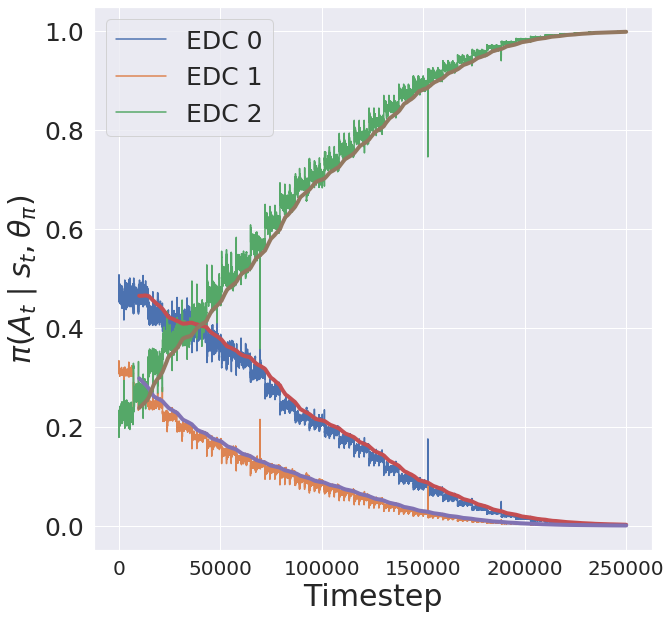

In [61]:
plt.figure(figsize=(10,10))
for col in df_3.columns:
    plt.plot(df_3.iloc[:250000][col], label=col)
for col in df_3.columns:
    plt.plot(pd.Series.rolling(pd.Series(df_3.iloc[:250000][col]), 10000).mean(), linewidth=4)
plt.ylabel(r'$\pi(A_{t} \mid s_{t}, \theta_{\pi})$', fontsize=30)
plt.xlabel('Timestep', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.show()

# Episodes: Loss, Mean Reward, etc.

In [34]:
! ls ../info

dist.txt	     vanilla_a3c_training_info.txt
mercury_info_parsed  vanilla_a3c_training_results.csv
train_arrays.txt


In [53]:
path_4 = '/media/hdd/Teleco/TFM/mercury/repo/lite/gride/gride_model/samples/summersim_2020/rl/results/2_new_NN_architecture/3_hetero_cooling/0_inlet_21_delta_0025_factor_01_sessions_5_episodes_45_great_results'
df_4 = pd.read_csv(path_4+"/training_results.csv",
                   delimiter=";",
                   names=["Episodes", "Length", "Rewards", "Loss", "Entropy"])
df_4

,Episodes,Length,Rewards,Loss,Entropy
0,0,7148,-1.517469e+07,0.769786,-0.001055
1,1,7141,-1.506000e+07,0.806213,-0.001062
2,2,7116,-1.482166e+07,0.761843,-0.001073
3,3,7202,-1.487886e+07,0.741185,-0.001067
4,4,7309,-1.500617e+07,0.751910,-0.001053
5,5,7347,-1.496826e+07,0.724588,-0.001039
6,6,7316,-1.464799e+07,0.689260,-0.001020
7,7,7181,-1.426872e+07,0.670185,-0.000997
8,8,7053,-1.410226e+07,0.689811,-0.000975
9,9,7167,-1.409043e+07,0.687674,-0.000944


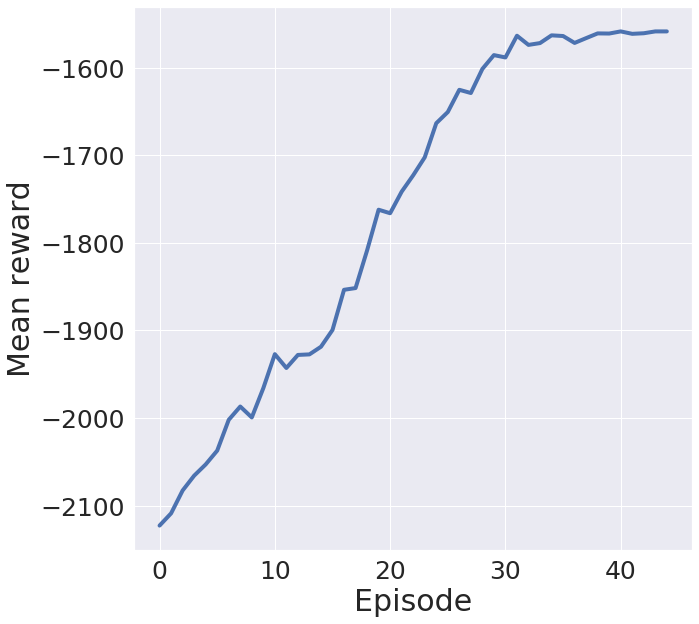

In [57]:
plt.figure(figsize=(10,10))
plt.plot(df_4["Rewards"]/df_4["Length"], linewidth=4)
plt.ylabel("Mean reward", fontsize=30)
plt.xlabel('Episode', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()


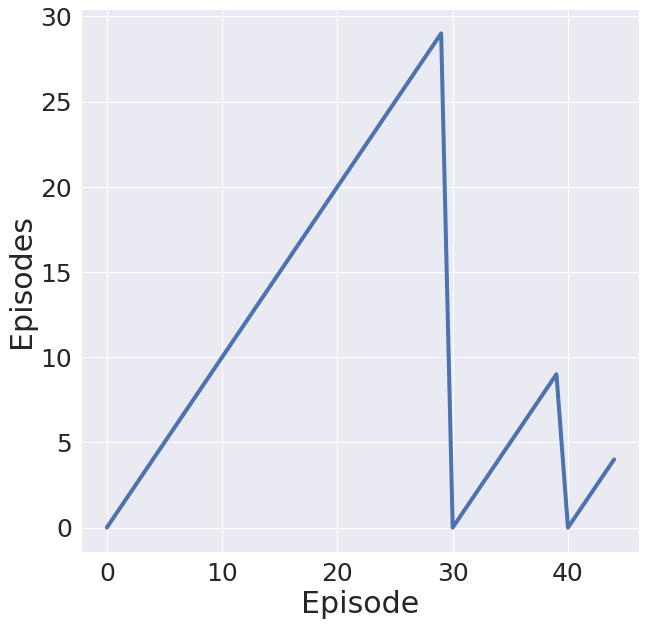

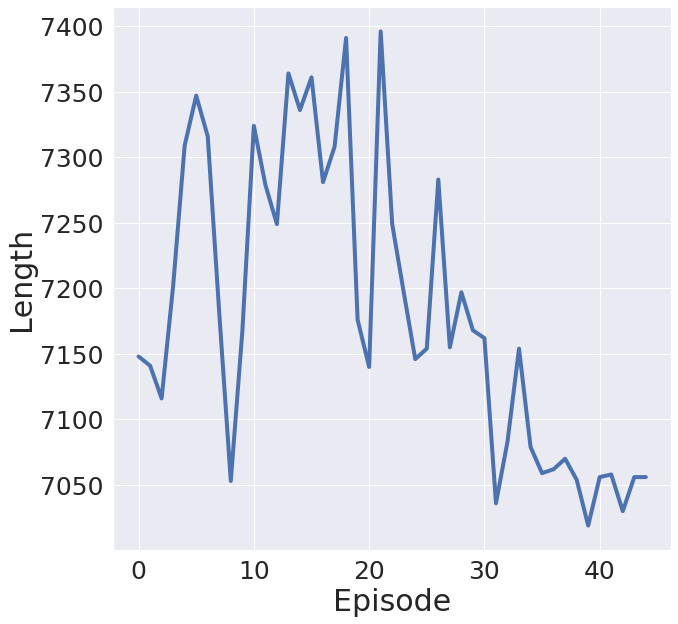

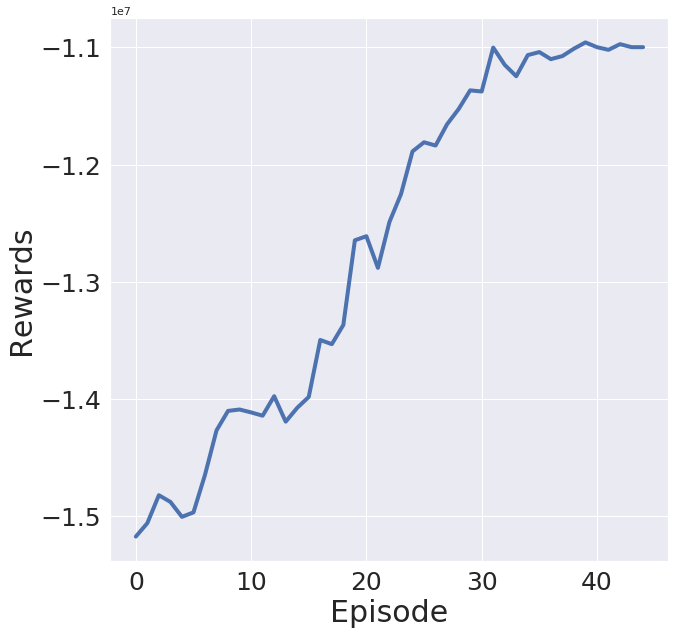

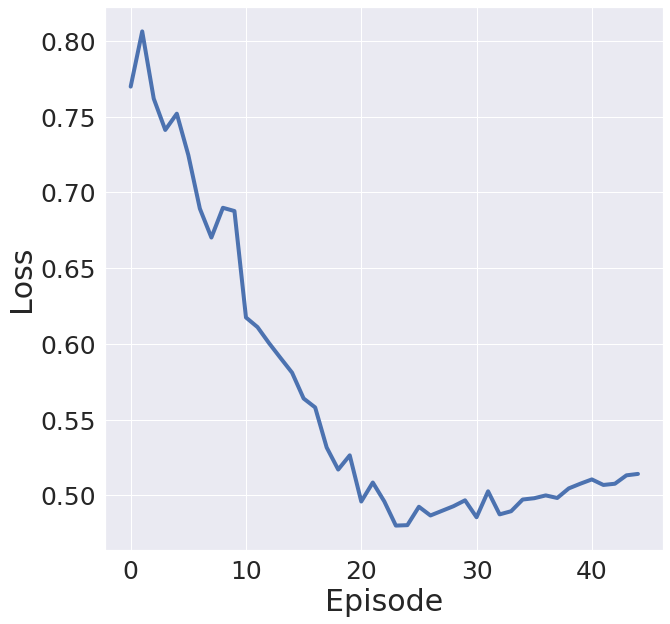

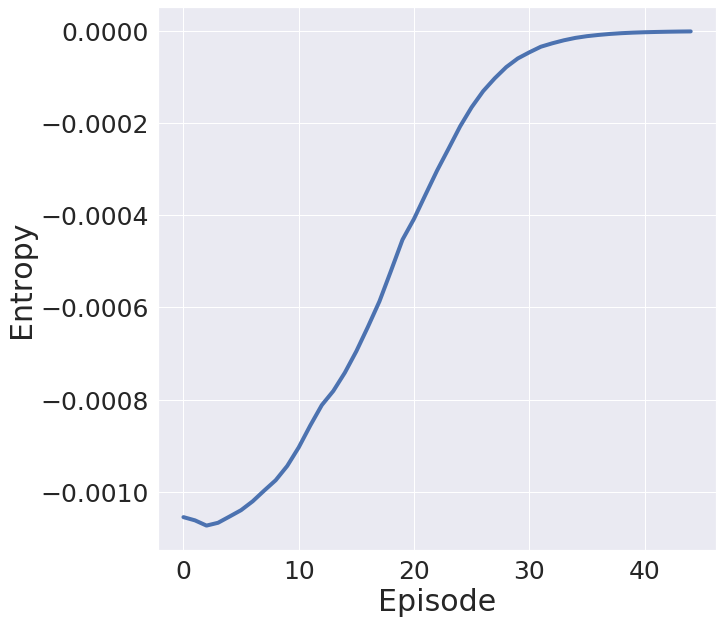

In [55]:
for col in df_4.columns:
    plt.figure(figsize=(10,10))
    plt.plot(df_4[col], linewidth=4)
    plt.ylabel(col, fontsize=30)
    plt.xlabel('Episode', fontsize=30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    #plt.legend(fontsize=25)
    plt.show()

# Episodes (2nd Option)

### Training info file must be cleaned before!! (remove lines with no commas)

In [96]:
df_5 = pd.read_csv('../info/vanilla_a3c_training_info.txt',
                   delimiter=",",
                   names=["episodes", "time", "length", "mean rewards", "loss"])

def compute_loss(x):
    losses = x.split(":")[1].split(" ")
    return sum([float(l) for l in losses[1:]])

for col in df_5.columns[:-1]:
    df_5[col] = df_5[col].str.split(":").str[1].astype(np.float)
df_5["entropy"] =  df_5["loss"].str.split(":").str[1].str.split(" ").str[3].astype(np.float)
df_5["loss"] =  df_5["loss"].apply(compute_loss)
df_5

AttributeError: 'float' object has no attribute 'split'

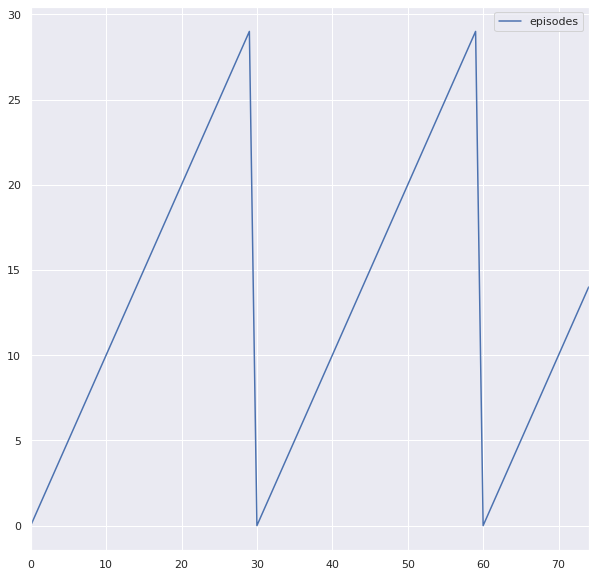

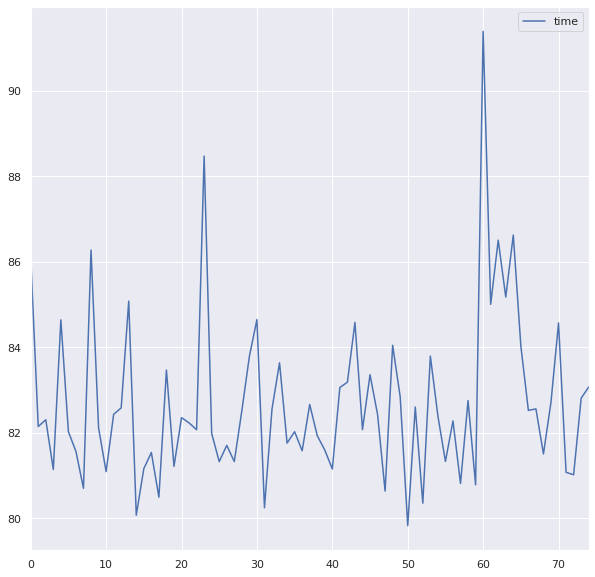

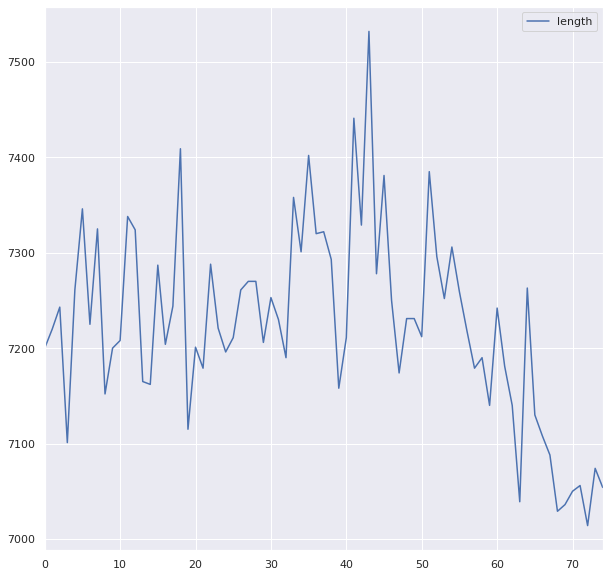

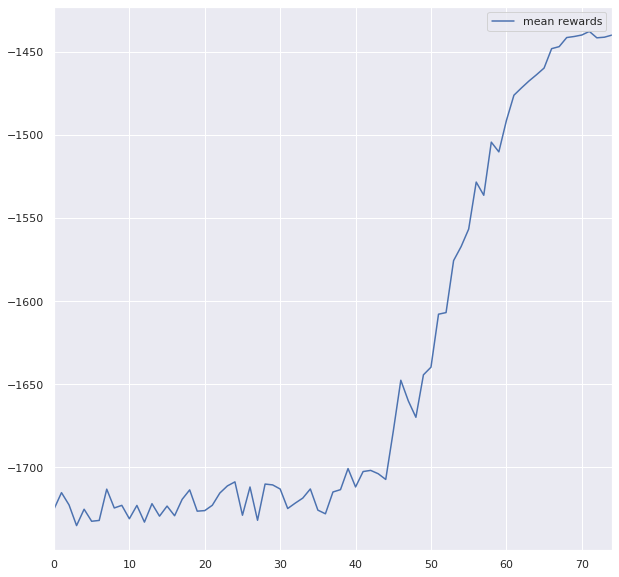

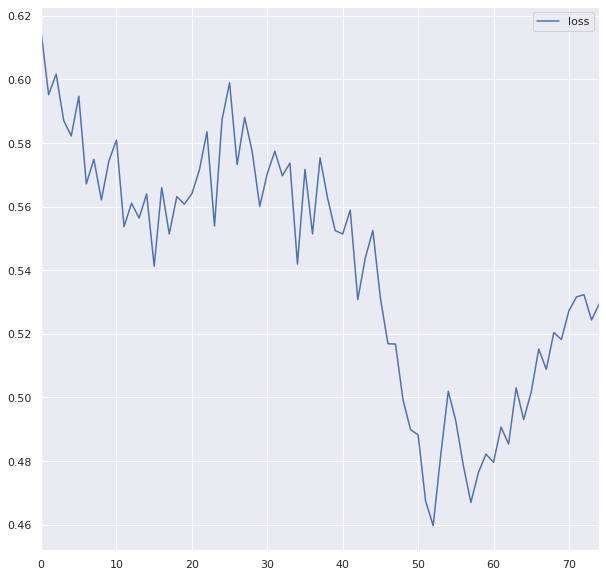

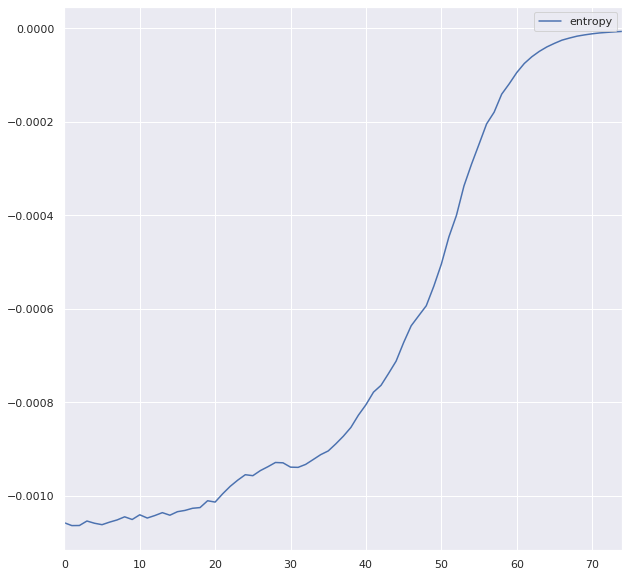

In [77]:
for col in df_5.columns:
    df_5.plot(y=col, figsize=(10,10))